<a href="https://colab.research.google.com/github/jk74u/FAIDM-Diabetes-Project/blob/main/Mainlogic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:

# Section 1: Install additional libraries and import all packages

# Install libraries for SMOTE & Visualisation
!pip install imbalanced-learn yellowbrick -q

# Data Manipulation
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.impute import SimpleImputer

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

# Evaluation Metrics
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    f1_score, silhouette_score
)

# Class Imbalance
from imblearn.over_sampling import SMOTE

# Visualisation Helpers
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Settings
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

print("All libraries imported successfully!")

All libraries imported successfully!


In [3]:
# Section 2: Loading the dataset
from google.colab import files
uploaded = files.upload()

#data into panda dataframe
df = pd.read_csv('CDC_Diabetes_Dataset.csv')
print(" Loading successful")
print(" Shape:" , df.shape)

Saving CDC_Diabetes_Dataset.csv to CDC_Diabetes_Dataset.csv
 Loading successful
 Shape: (253680, 22)


In [4]:
# data integrity load check
print("First 5 rows:")
df.head()

First 5 rows:


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
#data types and other info
print("Shape:" , df.shape)
print("\nData Types:\n" , df.dtypes)
print("\nData Types:\n" , df.dtypes)
df.info()

Shape: (253680, 22)

Data Types:
 Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

Data Types:
 Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDisea

In [6]:
# missing values check
print("Missing Values:")
print(df.isnull().sum())
print("\nTotal missing values:")
print(df.isnull().sum().sum())
# duplicate check
print("\nDuplicate Rows:")
print(df.duplicated().sum())
print("Dataset shape with duplicates")
print(df.shape)
df = df.drop_duplicates()
print("Dataset shape without duplicates")
print(df.shape)


Missing Values:
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Total missing values:
0

Duplicate Rows:
23899
Dataset shape with duplicates
(253680, 22)
Dataset shape without duplicates
(229781, 22)


In [7]:
# descriptive statistics
print("Summary statistics:")
df.describe().round(2)


Summary statistics:


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,229781.00,229781.00,229781.00,229781.00,229781.00,229781.00,229781.00,229781.0,229781.00,229781.00,...,229781.00,229781.00,229781.00,229781.00,229781.00,229781.00,229781.00,229781.00,229781.00,229781.00
mean,0.33,0.45,0.44,0.96,28.69,0.47,0.04,0.1,0.73,0.61,...,0.95,0.09,2.60,3.51,4.68,0.19,0.44,8.09,4.98,5.89
std,0.72,0.50,0.50,0.20,6.79,0.50,0.21,0.3,0.44,0.49,...,0.23,0.29,1.06,7.71,9.05,0.39,0.50,3.09,0.99,2.09
min,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00
25%,0.00,0.00,0.00,1.00,24.00,0.00,0.00,0.0,0.00,0.00,...,1.00,0.00,2.00,0.00,0.00,0.00,0.00,6.00,4.00,5.00
50%,0.00,0.00,0.00,1.00,27.00,0.00,0.00,0.0,1.00,1.00,...,1.00,0.00,3.00,0.00,0.00,0.00,0.00,8.00,5.00,6.00
75%,0.00,1.00,1.00,1.00,32.00,1.00,0.00,0.0,1.00,1.00,...,1.00,0.00,3.00,2.00,4.00,0.00,1.00,10.00,6.00,8.00
max,2.00,1.00,1.00,1.00,98.00,1.00,1.00,1.0,1.00,1.00,...,1.00,1.00,5.00,30.00,30.00,1.00,1.00,13.00,6.00,8.00


In [8]:
# Section 1: Install additional libraries and import all packages

# Install libraries for SMOTE & Visualisation
!pip install imbalanced-learn yellowbrick -q

# Data Manipulation
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.impute import SimpleImputer

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

# Evaluation Metrics
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    f1_score, silhouette_score
)

# Class Imbalance
from imblearn.over_sampling import SMOTE

# Visualisation Helpers
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Settings
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

print("All libraries imported successfully!")

All libraries imported successfully!


In [1]:
import sys

# Aggressively remove matplotlib and its submodules from sys.modules
# to ensure a complete and clean re-import.
for module in list(sys.modules.keys()):
    if module.startswith('matplotlib'):
        del sys.modules[module]

# Also delete the 'plt' variable if it exists in the current scope
# to ensure a fresh assignment after module reload.
if 'plt' in locals() or 'plt' in globals():
    del plt

# Now, re-import matplotlib.pyplot
import matplotlib.pyplot as plt

# class distribution analysis
print("value distribution")
print(df['Diabetes_012'].value_counts())
print("percentage:")
print(df['Diabetes_012'].value_counts(normalize=True).round(4) * 100)

# visualisation of distribution
fig , axes = plt.subplots(1,2, figsize=(10,5))

# bar chart  of class distribution
df['Diabetes_012'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Class Distribution')
axes[0].set_xlabel('Diabities Classification')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['No Diabetes', 'Diabetes', 'Prediabetes'])

# pie chart of class distribution
df['Diabetes_012'].value_counts().plot(kind='pie', ax=axes[1] , autopct='%1.1f%%', labels=['No Diabetes', 'Diabetes', 'Prediabetes'])
axes[1].set_title('Class Distribution (%)')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

value distribution


NameError: name 'df' is not defined

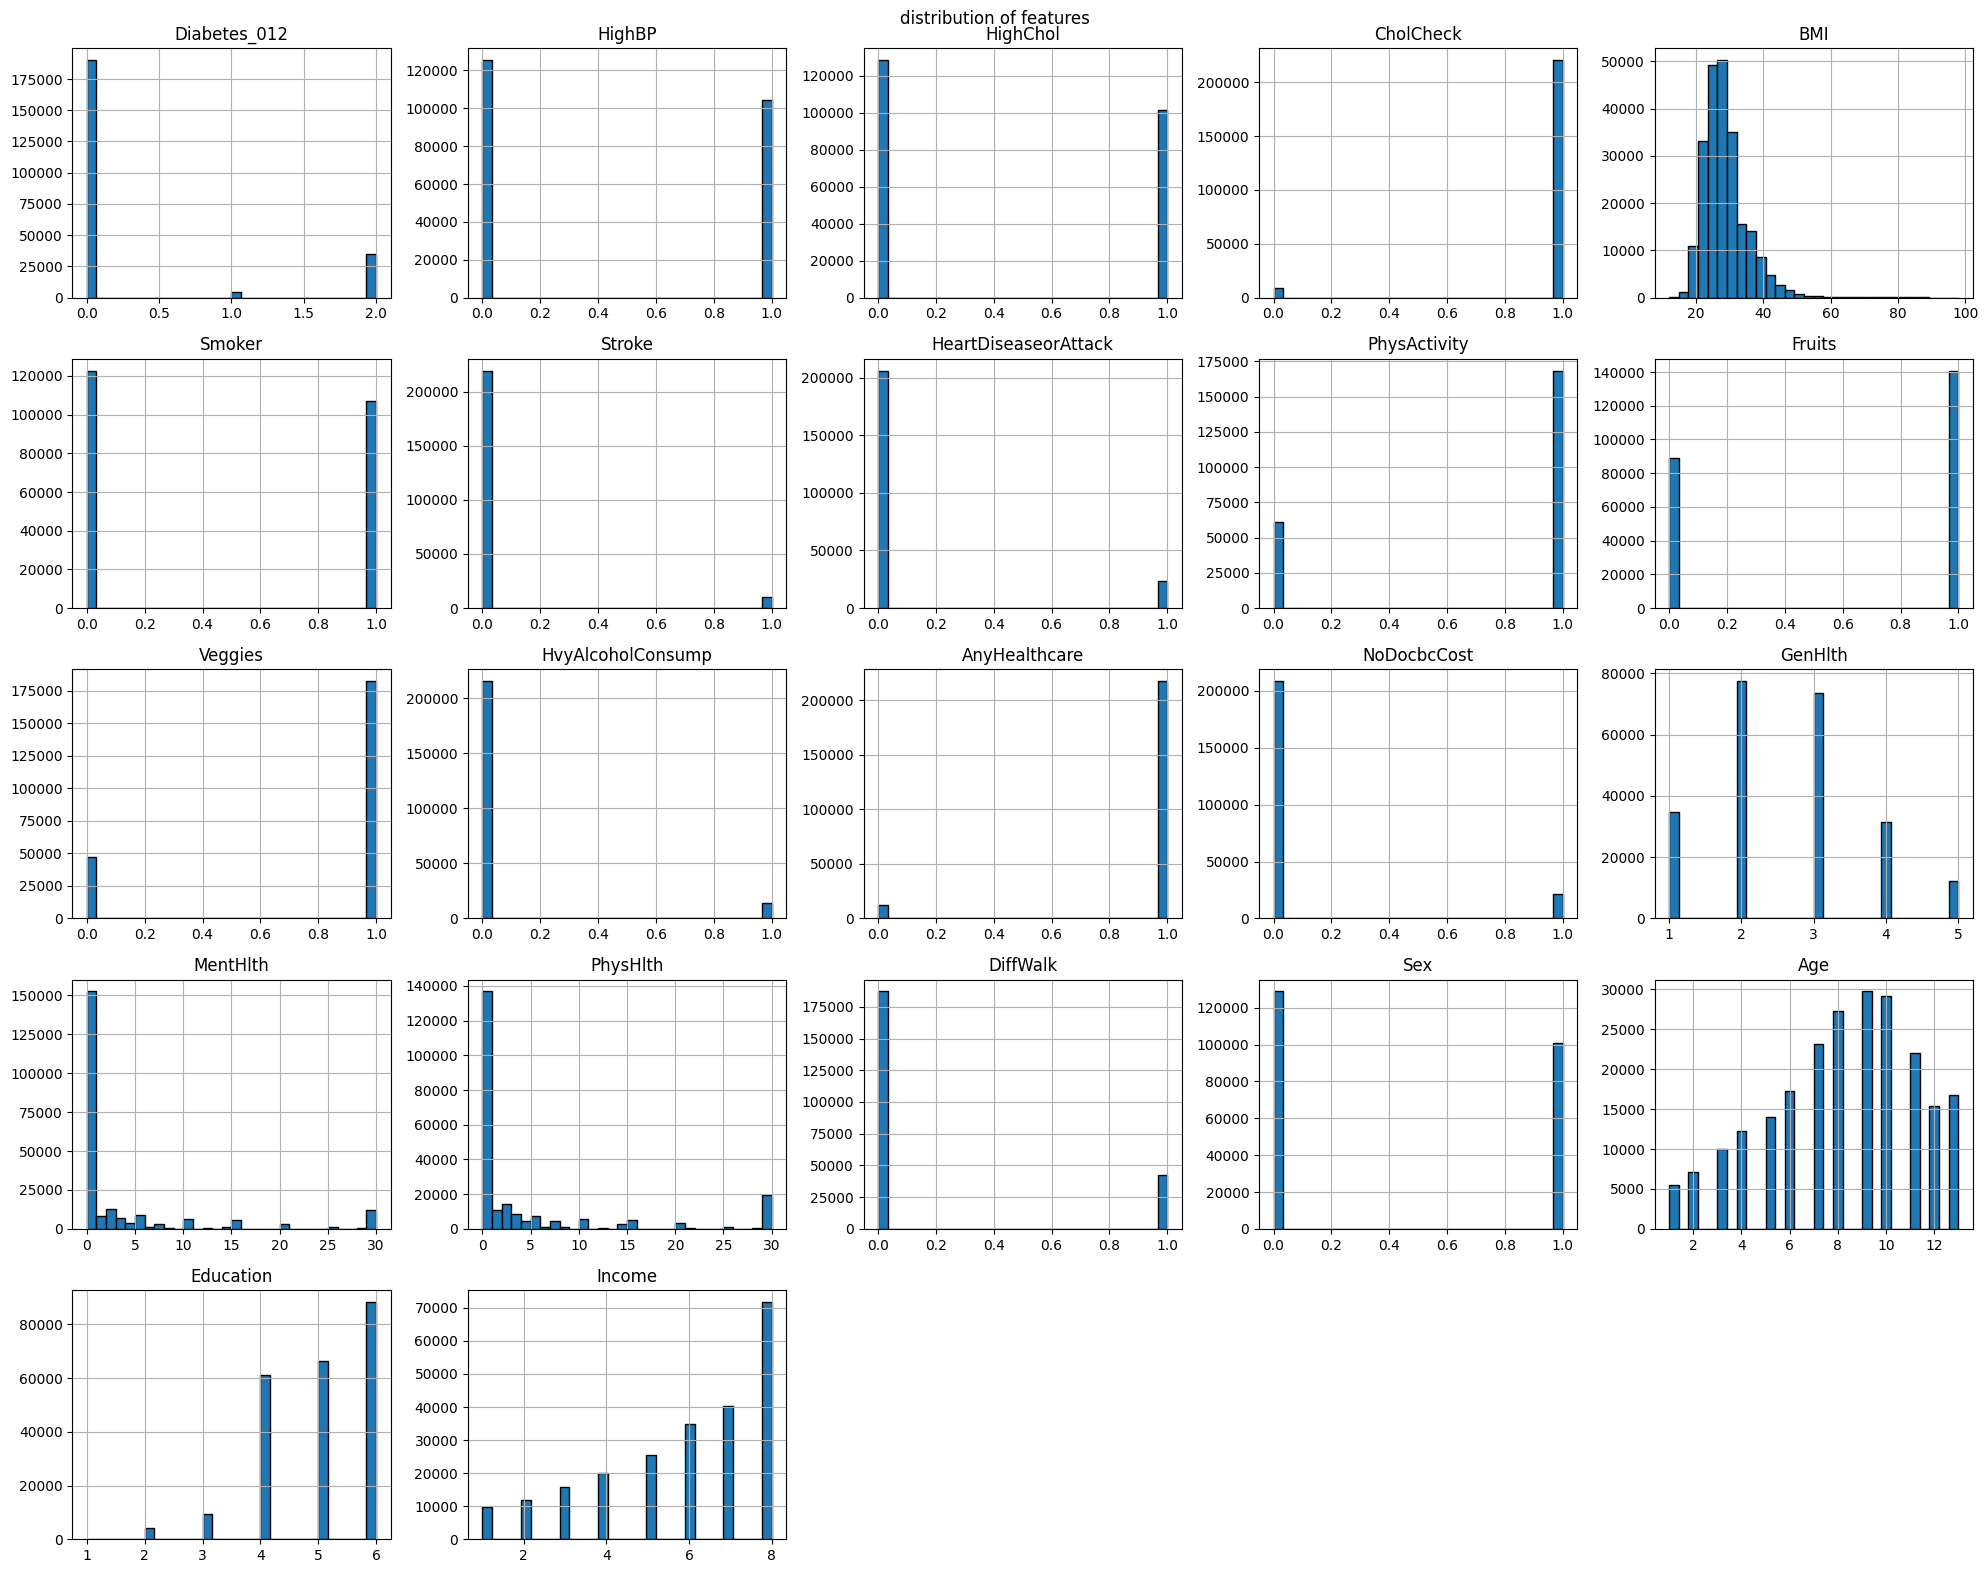

In [10]:
import sys

# Aggressively remove matplotlib and its submodules from sys.modules
# to ensure a complete and clean re-import.
for module in list(sys.modules.keys()):
    if module.startswith('matplotlib'):
        del sys.modules[module]

# Also delete the 'plt' variable if it exists in the current scope
# to ensure a fresh assignment after module reload.
if 'plt' in locals() or 'plt' in globals():
    del plt

# Now, re-import matplotlib.pyplot
import matplotlib.pyplot as plt

# distribution of all features
df.hist(figsize=(20,16), bins=30, edgecolor='black')
plt.suptitle('distribution of features')
plt.tight_layout()
plt.show()

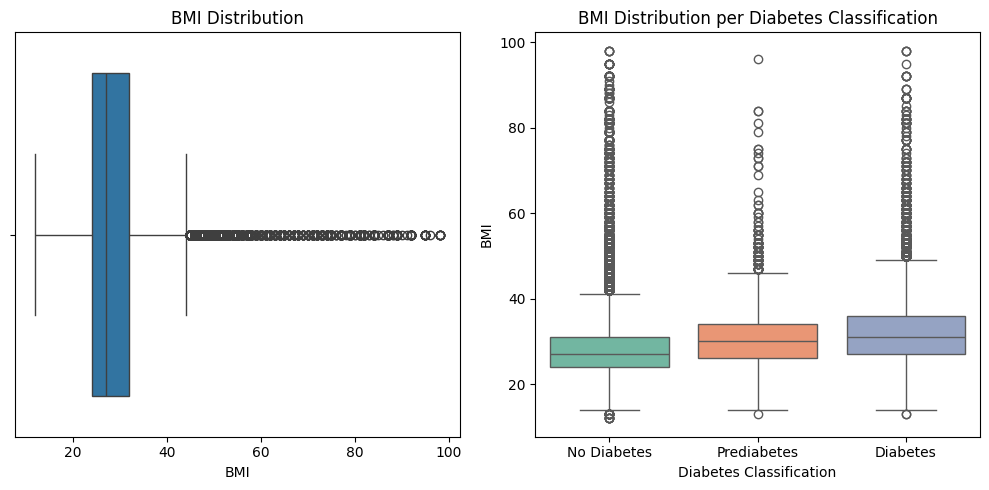

In [11]:
import sys

# Aggressively remove matplotlib and its submodules from sys.modules
# to ensure a complete and clean re-import.
for module in list(sys.modules.keys()):
    if module.startswith('matplotlib'):
        del sys.modules[module]
    if module.startswith('seaborn'): # Also remove seaborn to ensure it reloads with fresh matplotlib
        del sys.modules[module]

# Also delete the 'plt' and 'sns' variables if they exist in the current scope
if 'plt' in locals() or 'plt' in globals():
    del plt
if 'sns' in locals() or 'sns' in globals():
    del sns

# Now, re-import matplotlib.pyplot and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#BMI box plot to identify outliers
f , axes = plt.subplots(1,2, figsize=(10,5))

sns.boxplot(x=df['BMI'] , ax=axes[0])
axes[0].set_title('BMI Distribution')


#BMI distribution per diabities classification
sns.boxplot(x=df['Diabetes_012'] , y=df['BMI'] , ax=axes[1], palette='Set2')
axes[1].set_title('BMI Distribution per Diabetes Classification')
axes[1].set_xticklabels(['No Diabetes', 'Prediabetes', 'Diabetes'])
axes[1].set_xlabel('Diabetes Classification')
axes[1].set_ylabel('BMI')
plt.tight_layout()
plt.show()

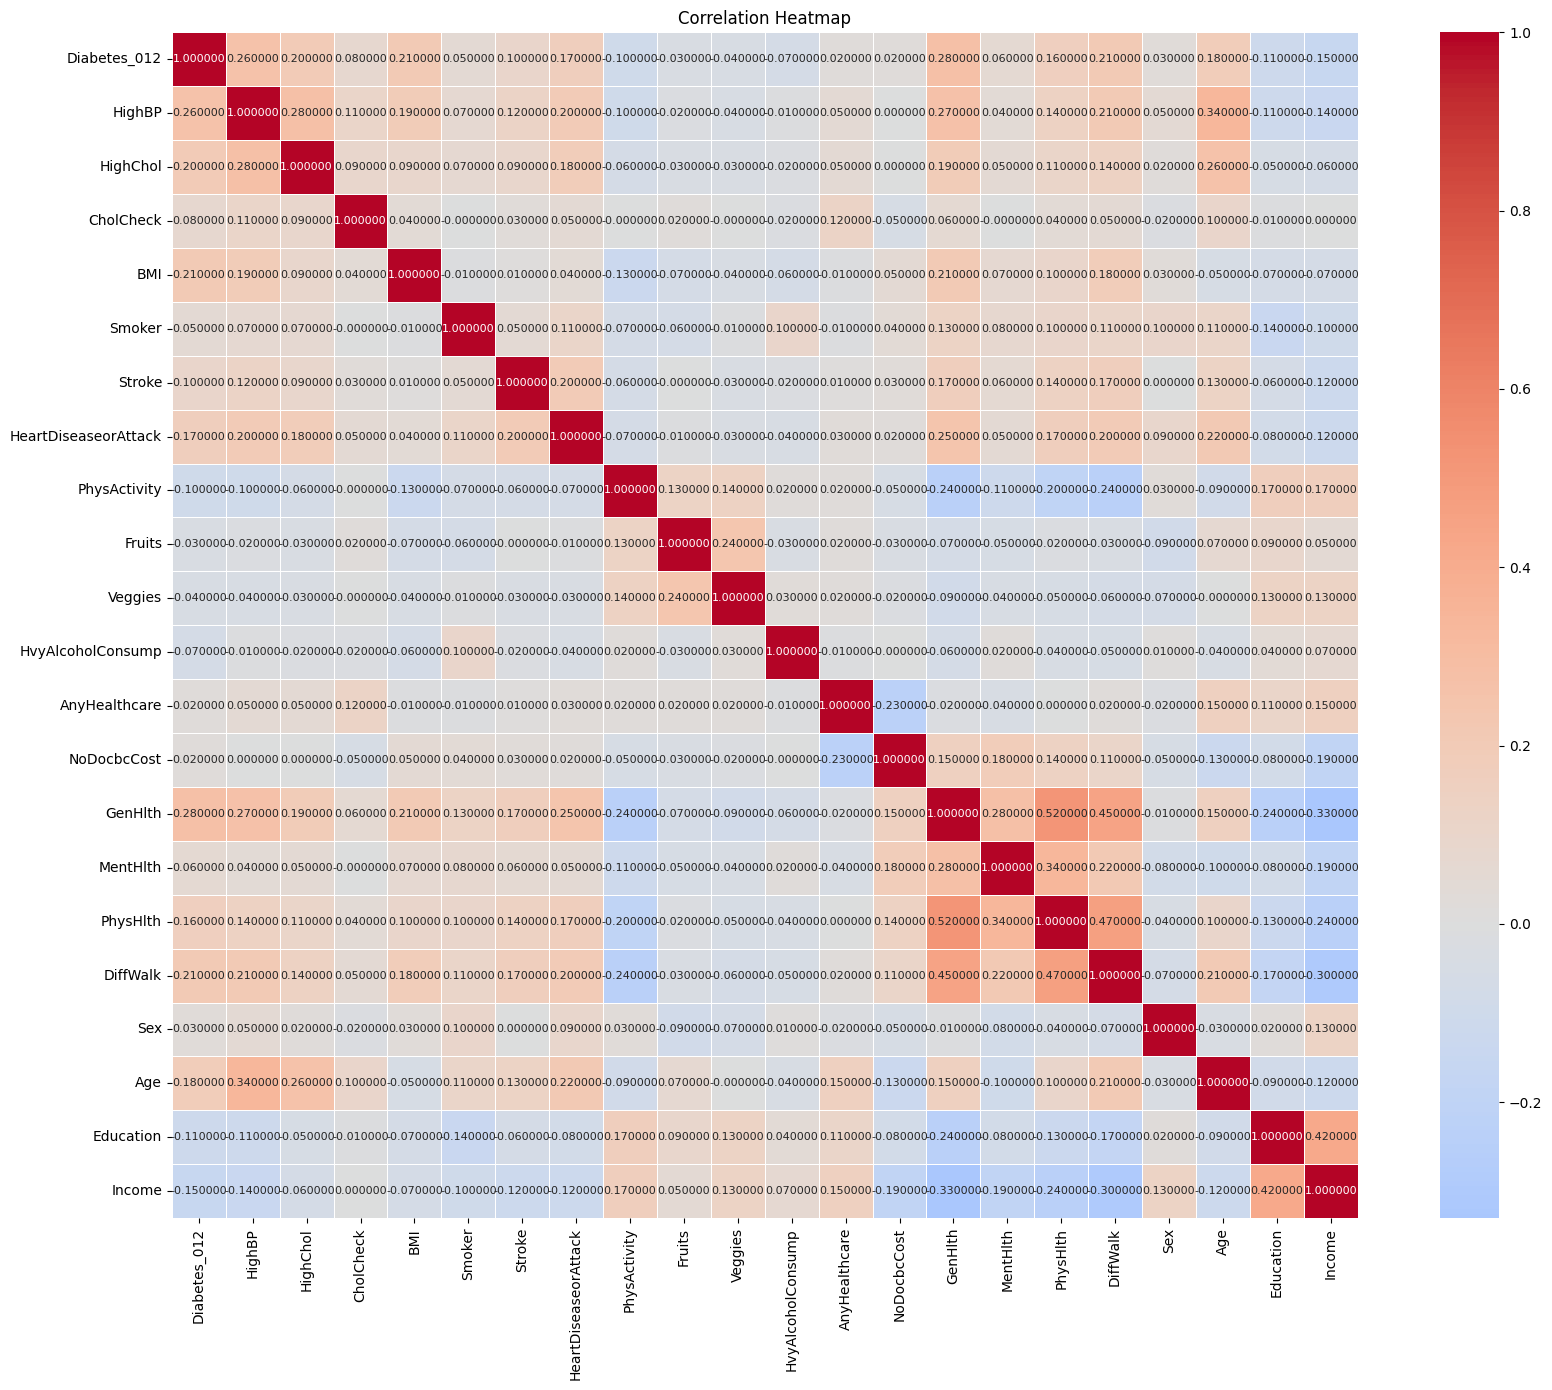

correlation of features with Diabities_012
Diabetes_012            1.00
GenHlth                 0.28
HighBP                  0.26
BMI                     0.21
DiffWalk                0.21
HighChol                0.20
Age                     0.18
HeartDiseaseorAttack    0.17
PhysHlth                0.16
Stroke                  0.10
CholCheck               0.08
MentHlth                0.06
Smoker                  0.05
Sex                     0.03
NoDocbcCost             0.02
AnyHealthcare           0.02
Fruits                 -0.03
Veggies                -0.04
HvyAlcoholConsump      -0.07
PhysActivity           -0.10
Education              -0.11
Income                 -0.15
Name: Diabetes_012, dtype: float64


In [12]:
#heatmap
correlation_matrix = df.corr().round(2)
plt.figure(figsize=(18,14))
sns.heatmap(correlation_matrix, annot=True, fmt='2f' , cmap='coolwarm' , center=0, square=True ,linewidth=0.5, annot_kws={'size': 8})
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

print("correlation of features with Diabities_012")
print(correlation_matrix['Diabetes_012'].sort_values(ascending=False))

mean of each feature in each class: Diabetes_012                0.0        1.0        2.0
HighBP                 0.395175   0.629078   0.752344
HighChol               0.395349   0.620868   0.669459
CholCheck              0.952672   0.986606   0.993133
BMI                   28.030528  30.726075  31.964242
Smoker                 0.455110   0.492763   0.519218
Stroke                 0.035521   0.057248   0.093113
HeartDiseaseorAttack   0.079961   0.143444   0.223837
PhysActivity           0.754055   0.678332   0.628515
Fruits                 0.618526   0.602506   0.584238
Veggies                0.802815   0.768849   0.754908
HvyAlcoholConsump      0.067928   0.044934   0.023706
AnyHealthcare          0.943622   0.945129   0.959484
NoDocbcCost            0.089369   0.129402   0.106619
GenHlth                2.463724   2.976021   3.295894
MentHlth               3.297914   4.531864   4.493404
PhysHlth               4.018805   6.351048   8.008491
DiffWalk               0.148520   0.277598   0

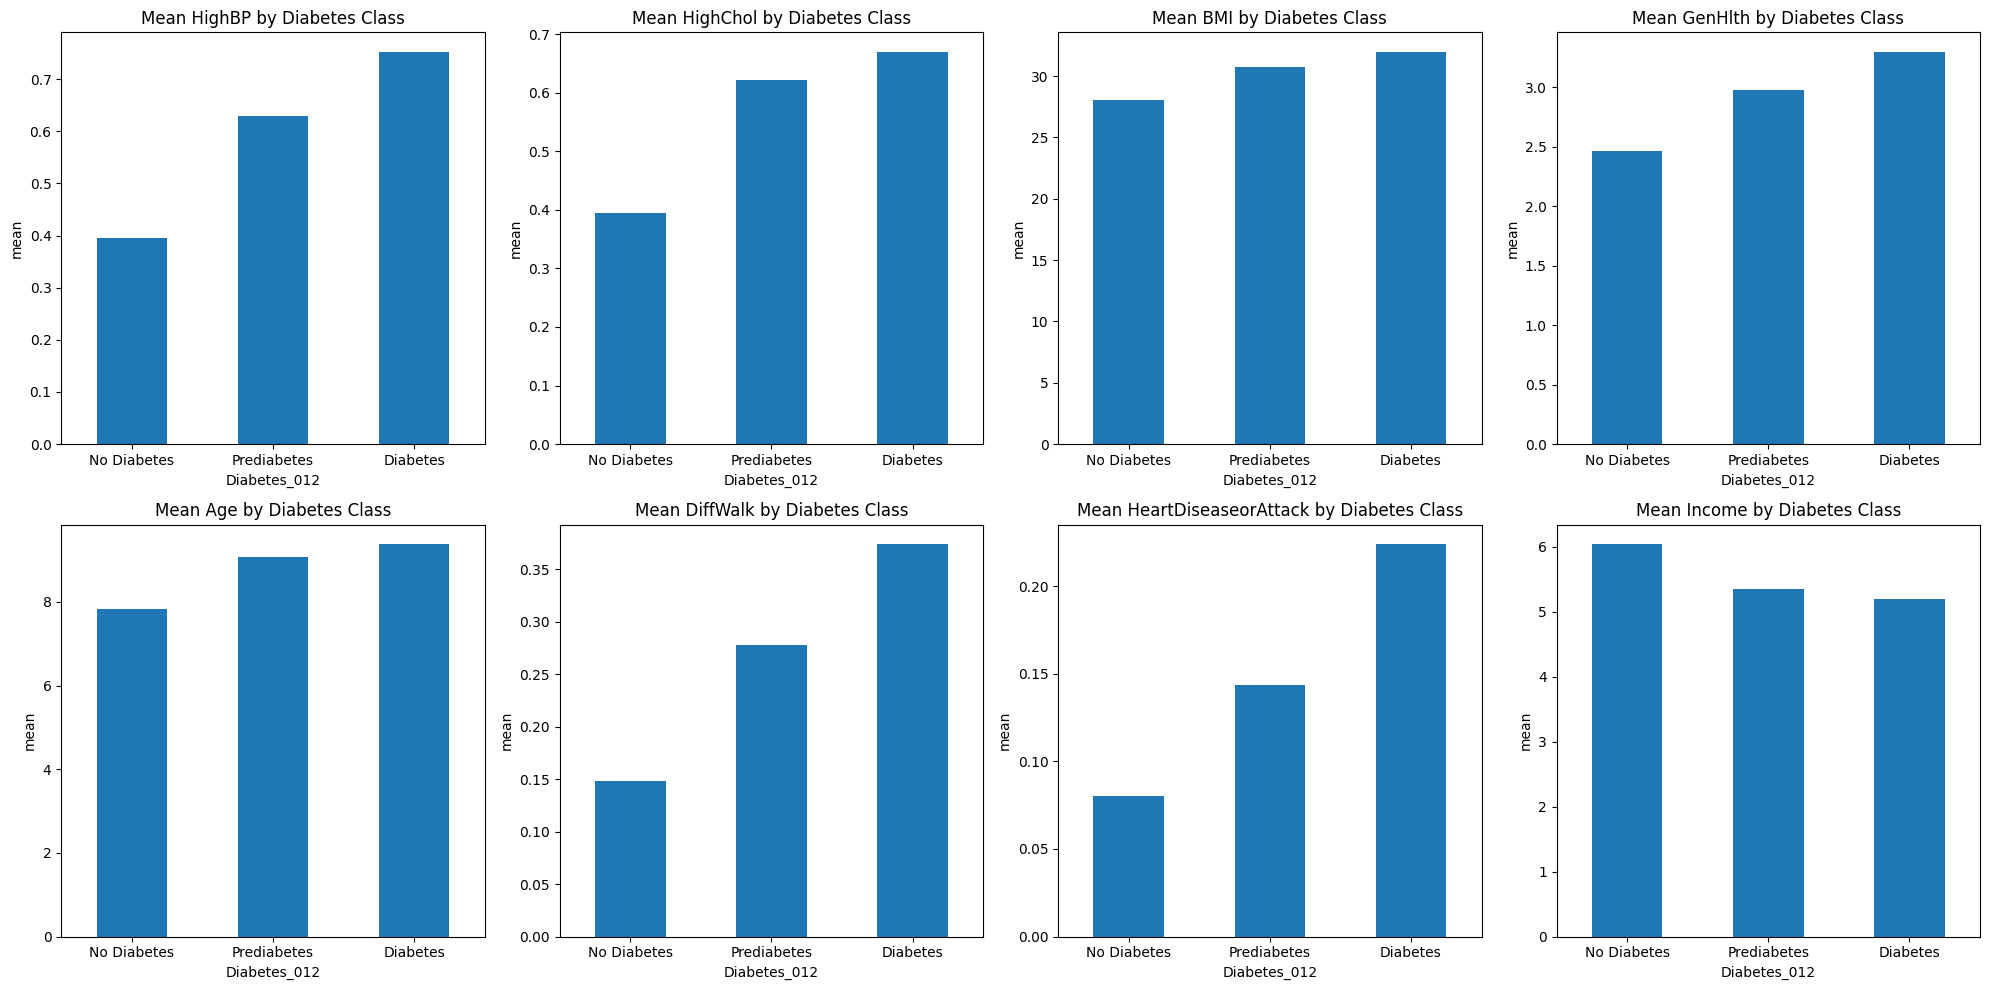

In [13]:
# feature analysis of each diabetes class
class_mean = df.groupby('Diabetes_012').mean()
class_mean.round(3)
print("mean of each feature in each class:", class_mean.T)
#visualisation
key_features = ['HighBP' , 'HighChol' , 'BMI' , 'GenHlth' , 'Age' , 'DiffWalk' , 'HeartDiseaseorAttack' , 'Income']

f, axes = plt.subplots(2,4, figsize=(20, 10))
axes = axes.flatten()

for i,feature in enumerate(key_features):
     df.groupby('Diabetes_012')[feature].mean().plot(kind='bar', ax=axes[i] )
     axes[i].set_title(f'Mean {feature} by Diabetes Class')
     axes[i].set_xticklabels(['No Diabetes', 'Prediabetes', 'Diabetes'] , rotation=0)
     axes[i].set_ylabel('mean')

plt.tight_layout()
plt.show()


**DATA** **PREPROCESSING**

Binary Target Distribution
Diabetes_binary
0    190055
1     39726
Name: count, dtype: int64

Percentage:
Diabetes_binary
0    82.71
1    17.29
Name: proportion, dtype: float64


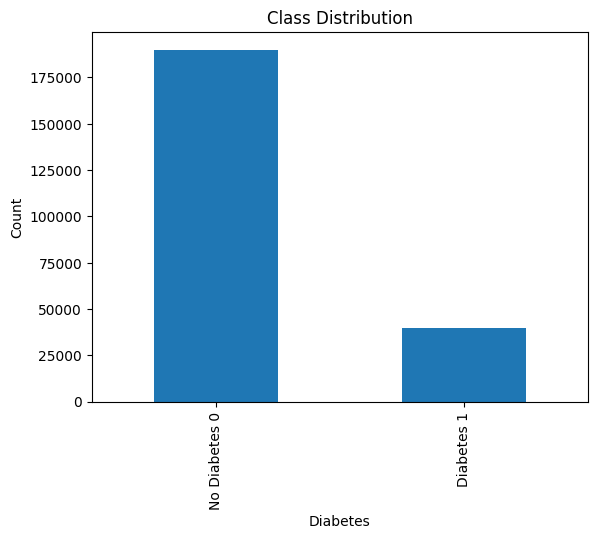

In [14]:
#3WAY CLASSIFICATION to BINARY CLASSIFICATION
df['Diabetes_012_original'] = df['Diabetes_012']
df['Diabetes_binary'] = df['Diabetes_012'].apply(lambda x: 1 if x > 0 else 0)
df = df.drop('Diabetes_012', axis=1)
#Distribution check
print("Binary Target Distribution")
print(df['Diabetes_binary'].value_counts())
print("\nPercentage:")
print(df['Diabetes_binary'].value_counts(normalize=True).round(4) * 100)
#visualisation
df['Diabetes_binary'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xticks([0 , 1], ['No Diabetes 0', 'Diabetes 1'])
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()


In [15]:
#TRain/testsplit
X = df.drop(['Diabetes_binary','Diabetes_012_original'] , axis=1)
y = df['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training target distribution:")
print(y_train.value_counts())
print("Test target distribution:")
print(y_test.value_counts())

Training set shape: (183824, 21)
Test set shape: (45957, 21)
Training target distribution:
Diabetes_binary
0    152043
1     31781
Name: count, dtype: int64
Test target distribution:
Diabetes_binary
0    38012
1     7945
Name: count, dtype: int64


In [16]:
#Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#convert back into dataframes for readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("SCaling complete")
print(X_train_scaled.head())
print("\nMean of scaled training features: (=0)")
print(X_train_scaled.mean().round(4))

SCaling complete
          HighBP  HighChol  CholCheck       BMI    Smoker    Stroke  \
241456  1.093445  1.122758   0.204168 -0.838984 -0.936166 -0.216122   
6033   -0.914541  1.122758   0.204168 -0.544331 -0.936166 -0.216122   
217575 -0.914541 -0.890664   0.204168 -0.249678 -0.936166 -0.216122   
101415 -0.914541  1.122758   0.204168 -1.133637 -0.936166 -0.216122   
84119  -0.914541 -0.890664   0.204168 -0.249678 -0.936166 -0.216122   

        HeartDiseaseorAttack  PhysActivity    Fruits   Veggies  ...  \
241456             -0.339371      0.603461  0.794176  0.507683  ...   
6033               -0.339371      0.603461  0.794176  0.507683  ...   
217575             -0.339371      0.603461 -1.259167 -1.969734  ...   
101415             -0.339371      0.603461  0.794176  0.507683  ...   
84119              -0.339371      0.603461  0.794176  0.507683  ...   

        AnyHealthcare  NoDocbcCost   GenHlth  MentHlth  PhysHlth  DiffWalk  \
241456       0.238595    -0.318934 -0.566137 -0.454

PreSMOTE:
Diabetes_binary
0    152043
1     31781
Name: count, dtype: int64
Training set size: 183824

PostSMOTE:
Diabetes_binary
0    152043
1    152043
Name: count, dtype: int64
Training set size: 304086


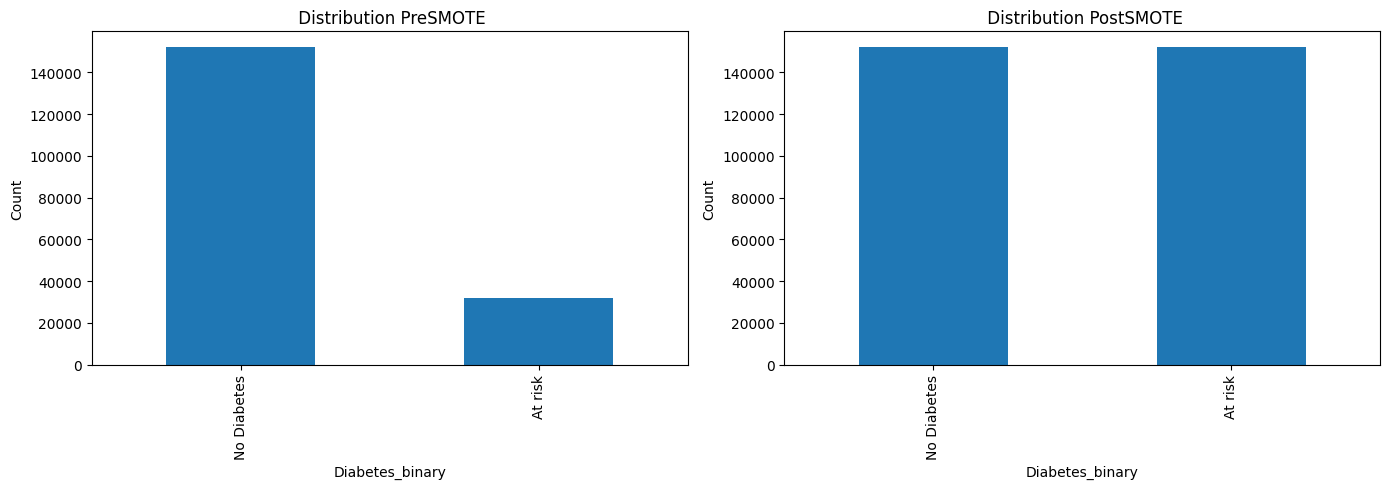

In [17]:
#SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print("PreSMOTE:")
print(y_train.value_counts())
print(f"Training set size: {X_train_scaled.shape[0]}")

print("\nPostSMOTE:")
print(y_train_smote.value_counts())
print(f"Training set size: {X_train_smote.shape[0]}")
#Visualisation
f , axes = plt.subplots(1,2, figsize=(14,5))

y_train.value_counts().plot(kind='bar' , ax=axes[0] )
axes[0].set_title(' Distribution PreSMOTE')
axes[0].set_xticklabels(['No Diabetes' ,'At risk'])
axes[0].set_ylabel('Count')

y_train_smote.value_counts().plot(kind='bar' , ax=axes[1] )
axes[1].set_title(' Distribution PostSMOTE')
axes[1].set_xticklabels(['No Diabetes' ,'At risk'])
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

**Clustering**

In [18]:
#clustering
cluster_features = df.drop(['Diabetes_binary' , 'Diabetes_012_original'] , axis=1 )
scaler_cluster = StandardScaler()
cluster_scaled = scaler_cluster.fit_transform(cluster_features)

print("Clustering data shape:", cluster_scaled.shape)
print("Features used for clustering:", list(cluster_features.columns))

Clustering data shape: (229781, 21)
Features used for clustering: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


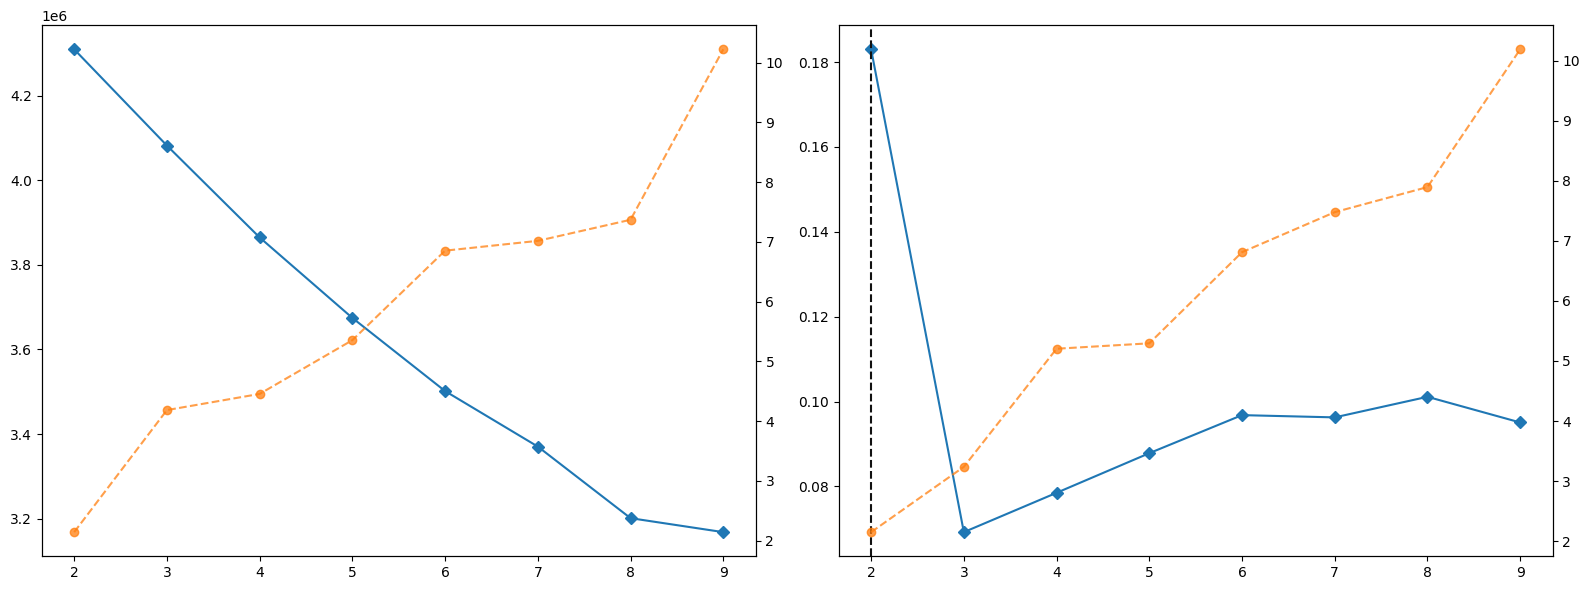

Optimal K by ECSS elbow: None
Optimal K by Silhouette elbow: 2


In [19]:
import matplotlib.pyplot as plt

# elbow method
f, axes = plt.subplots(1, 2, figsize=(16, 6))

model_wcss = KMeans(random_state=42, n_init=10)
visualizer_wcss =KElbowVisualizer(model_wcss, k=(2, 10), ax=axes[0])
visualizer_wcss.fit(cluster_scaled)
axes[0]

model_sil = KMeans(random_state=42, n_init=10)
visualizer_sil = KElbowVisualizer(model_sil, k=(2, 10), metric ='silhouette' , ax=axes[1])
visualizer_sil.fit(cluster_scaled)
axes[1]

plt.tight_layout()
plt.show()

print("Optimal K by ECSS elbow:", visualizer_wcss.elbow_value_)
print("Optimal K by Silhouette elbow:", visualizer_sil.elbow_value_)

cluster Sizes: Cluster
0    102362
1     86118
2     41301
Name: count, dtype: int64

Explained Variance Ratio: [0.1562 0.0847]
Total Explained Variance: 24.09%


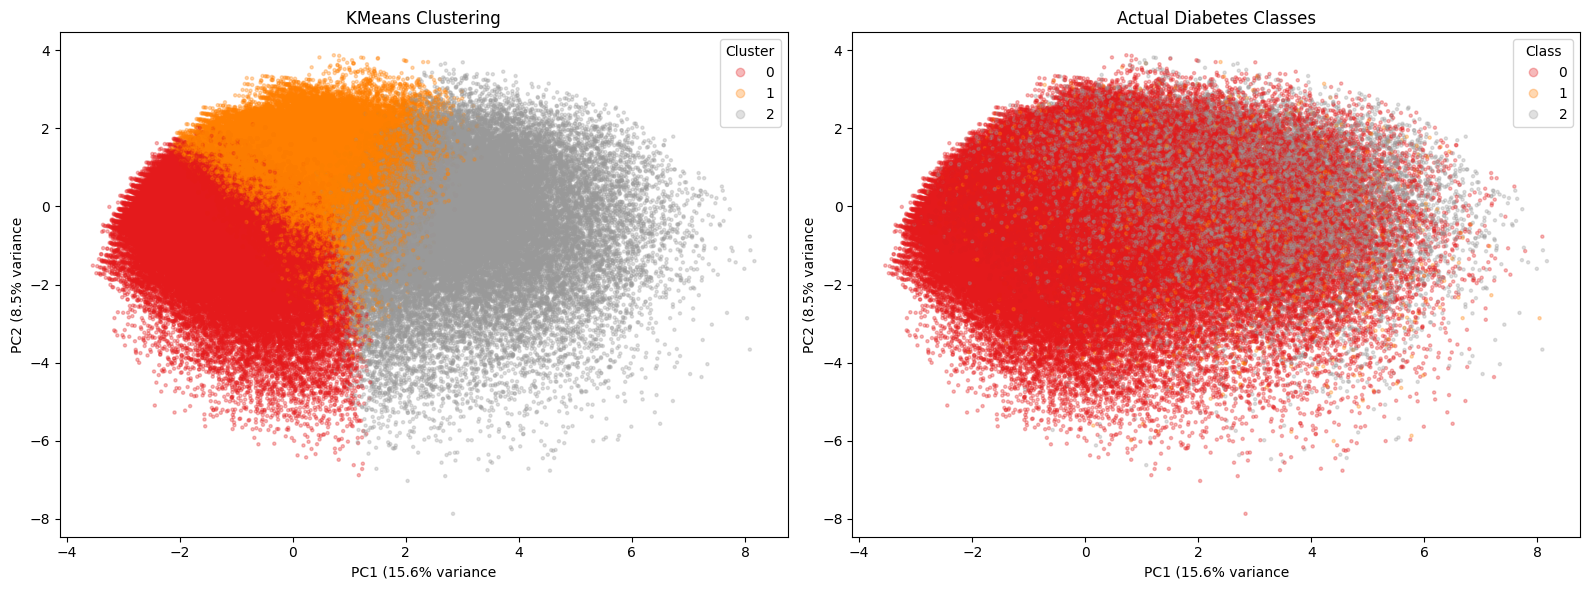

In [20]:
import matplotlib.pyplot as plt

# Kmeans cluster and visualisation with pca
kmeans = KMeans(n_clusters=3, init='k-means++' , random_state=42 , n_init=10)
kmeans_labels = kmeans.fit_predict(cluster_scaled)

df['Cluster'] = kmeans_labels
print("cluster Sizes:" , df['Cluster'].value_counts().sort_index())

pca = PCA(n_components=2)
cluster_pca = pca.fit_transform(cluster_scaled)

print(f"\nExplained Variance Ratio: {pca.explained_variance_ratio_.round(4)}")
print(f"Total Explained Variance: {sum(pca.explained_variance_ratio_):.2%}")

#visulaisation
f, axes = plt.subplots(1, 2, figsize=(16, 6))

#plot for kmeans cluster
scatter1 = axes[0].scatter(cluster_pca[:, 0], cluster_pca[:, 1] , c=kmeans_labels, cmap='Set1', alpha=0.3, s=5)
axes[0].set_title('KMeans Clustering')
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance')
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance')
axes[0].legend(*scatter1.legend_elements(), title='Cluster')

#Comparison for actuall diabetes classes
scatter2 = axes[1].scatter(cluster_pca[:, 0], cluster_pca[:, 1], c=df['Diabetes_012_original'], cmap='Set1', alpha=0.3, s=5)
axes[1].set_title('Actual Diabetes Classes')
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance')
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance')
axes[1].legend(*scatter2.legend_elements(), title='Class')

plt.tight_layout()
plt.show()

Cluster Profiles (Mean):
Cluster                    0       1       2
HighBP                 0.067   0.807   0.679
HighChol               0.199   0.653   0.604
BMI                   27.106  29.280  31.361
GenHlth                2.075   2.590   3.928
Age                    6.308   9.765   8.994
Income                 6.532   6.005   4.063
PhysActivity           0.836   0.748   0.450
HeartDiseaseorAttack   0.008   0.136   0.270
Diabetes_binary        0.049   0.233   0.355
Smoker                 0.362   0.517   0.614
Stroke                 0.006   0.041   0.149


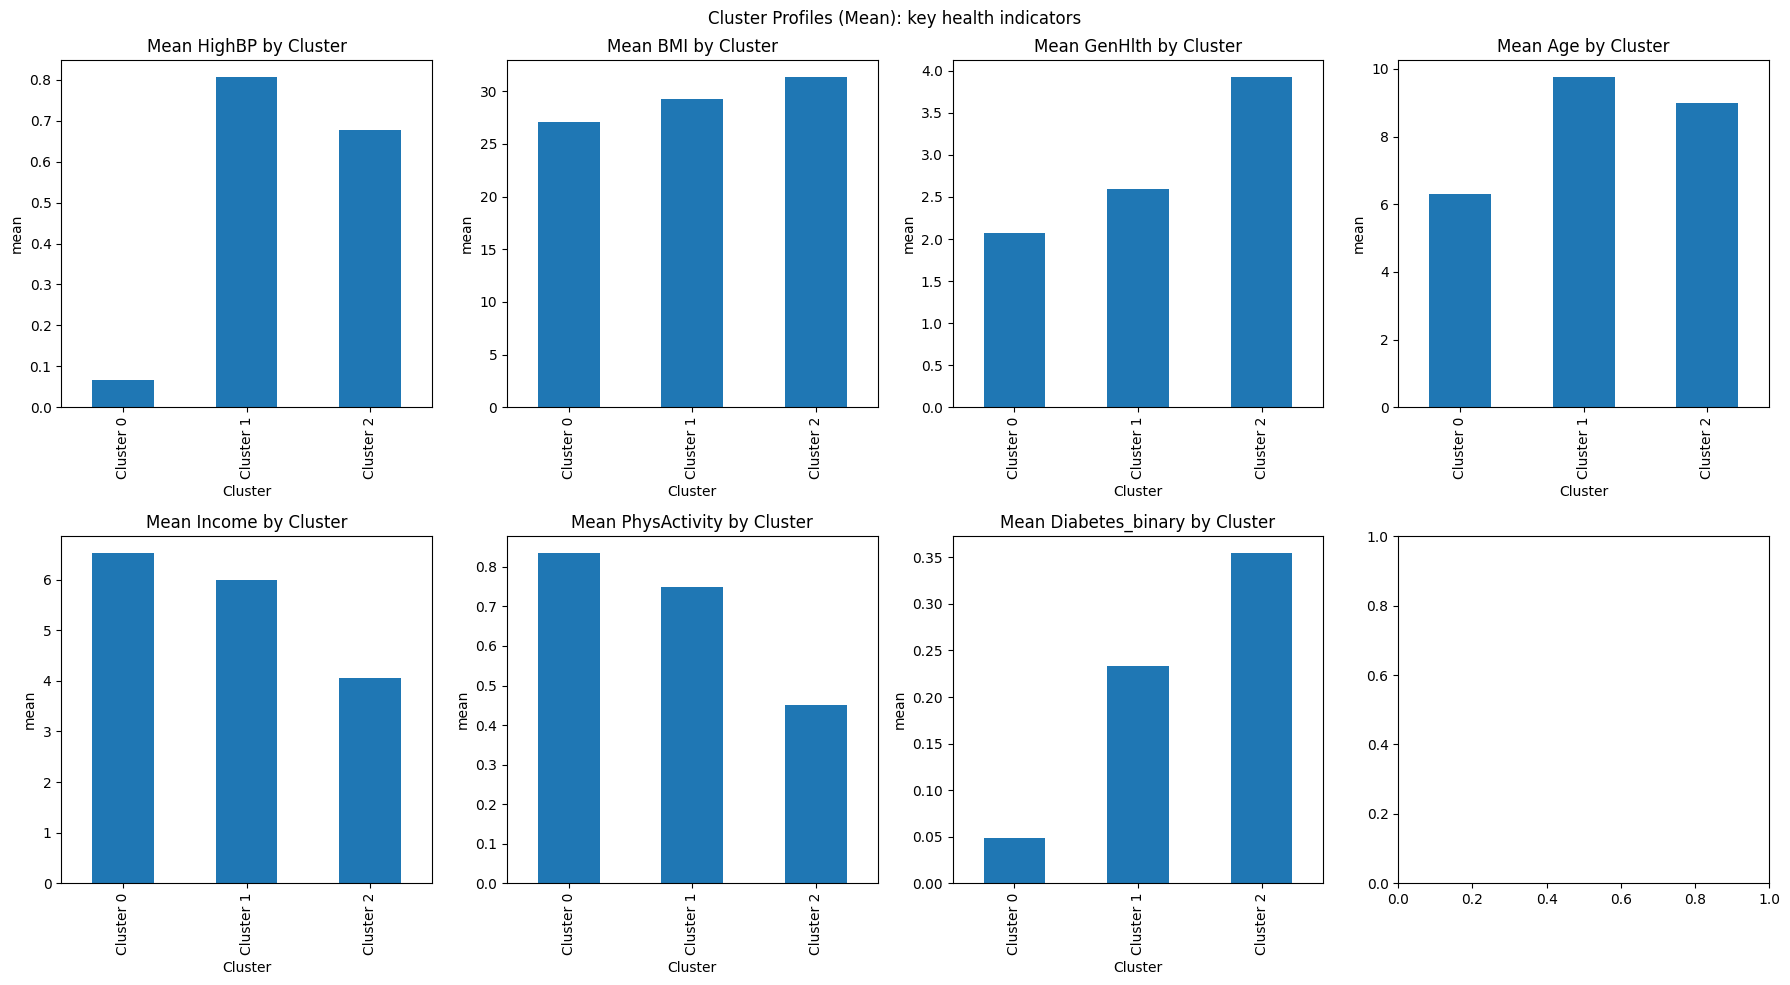

Diabetes rate per cluster
Cluster
0    0.049
1    0.233
2    0.355
Name: Diabetes_binary, dtype: float64
Cluster size
Cluster
0    102362
1     86118
2     41301
Name: count, dtype: int64


In [21]:
#Mean feature values per cluster
cluster_profile = df.groupby('Cluster').agg({
    'HighBP': 'mean',
    'HighChol': 'mean',
    'BMI': 'mean',
    'GenHlth': 'mean',
    'Age': 'mean',
    'Income': 'mean',
    'PhysActivity': 'mean',
    'HeartDiseaseorAttack': 'mean' ,
    'Diabetes_binary': 'mean' ,
    'Smoker': 'mean' ,
    'Stroke': 'mean'
}).round(3)

print("Cluster Profiles (Mean):")
print(cluster_profile.T)

#visualise
key_features = ['HighBP', 'BMI', 'GenHlth', 'Age', 'Income', 'PhysActivity', 'Diabetes_binary']

f, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(key_features):
  df.groupby('Cluster')[feature].mean().plot(kind='bar', ax=axes[i])
  axes[i].set_title(f'Mean {feature} by Cluster')
  axes[i].set_xticklabels(['Cluster 0', 'Cluster 1', 'Cluster 2'])
  axes[i].set_ylabel('mean')

plt.suptitle('Cluster Profiles (Mean): key health indicators')
plt.tight_layout()
plt.show()

#actual cluster proportions
print("Diabetes rate per cluster")
print(df.groupby('Cluster')['Diabetes_binary'].mean().round(3))
print("Cluster size")
print(df['Cluster'].value_counts().sort_index())

Classification Analysis

Logistic Regression Metrics:

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.72      0.81     38012
           1       0.35      0.75      0.48      7945

    accuracy                           0.72     45957
   macro avg       0.64      0.73      0.64     45957
weighted avg       0.83      0.72      0.75     45957


Confusion Matrix:
[[27182 10830]
 [ 2017  5928]]


<function matplotlib.pyplot.show(close=None, block=None)>

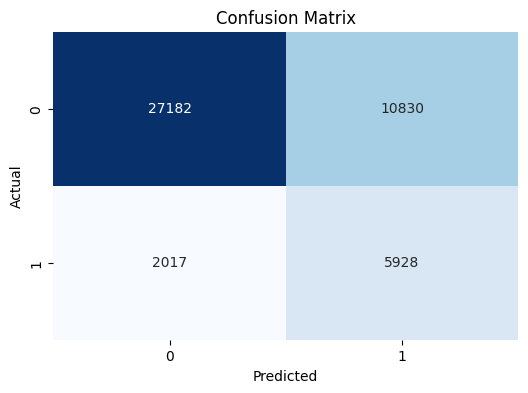

In [22]:
# Train logistic regression on SMOTE data
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_smote, y_train_smote)

y_pred_lr = lr_model.predict(X_test_scaled)

#Evaluation
print("Logistic Regression Metrics:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)
print("\nConfusion Matrix:")
print(cm_lr)

#Matrix plot
plt.figure(figsize=(6,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show



Training Random Forest with GridSearch
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200}
Best CV f1 score: 0.8346
Random Forest Metrics:

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     38012
           1       0.46      0.46      0.46      7945

    accuracy                           0.81     45957
   macro avg       0.67      0.67      0.67     45957
weighted avg       0.81      0.81      0.81     45957


Confusion Matrix:
[[33780  4232]
 [ 4317  3628]]


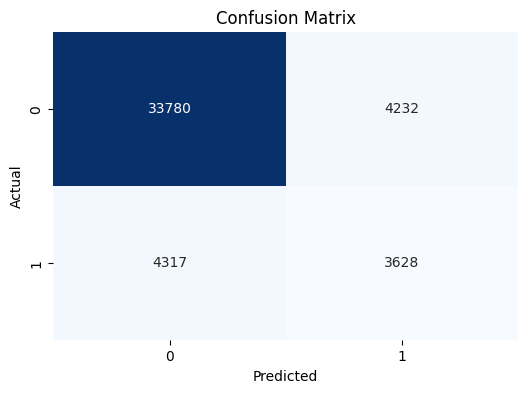

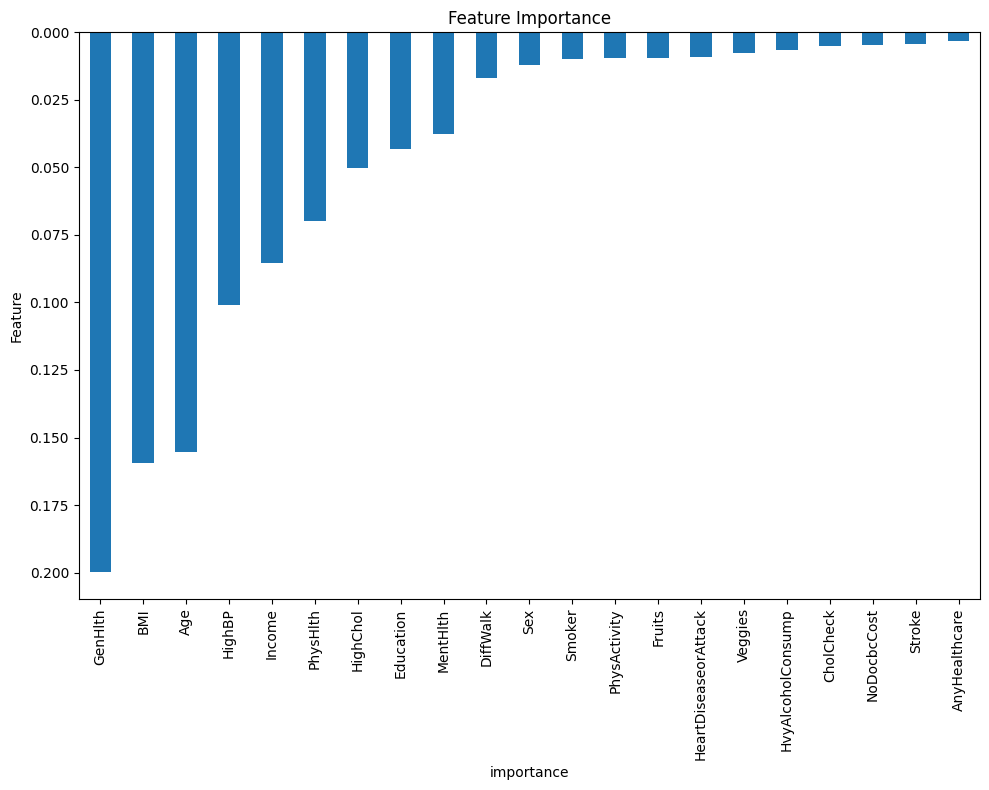

Feature Importance top 5:
GenHlth    0.199650
BMI        0.159606
Age        0.155263
HighBP     0.100769
Income     0.085368
dtype: float64


In [23]:
#Random forest
rf_model = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200,] ,
    'max_depth': [10, 20, None] ,
    'min_samples_split': [1, 5] ,
    'max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV ( rf_model , param_grid=param_grid_rf, cv=5, scoring='f1', n_jobs=-1 , verbose=1)
print("Training Random Forest with GridSearch")
grid_rf.fit(X_train_smote, y_train_smote)

print("Best Parameters:", grid_rf.best_params_)
print("Best CV f1 score: {:.4f}".format(grid_rf.best_score_))

# predict on test set
y_pred_rf = grid_rf.predict(X_test_scaled)

print("Random Forest Metrics:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:")
print(cm_rf)

#plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Feature Importance
feature_importance = pd.Series(
    grid_rf.best_estimator_.feature_importances_,
    index=X_train_smote.columns
).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("Feature Importance top 5:")
print(feature_importance.head())

KNN training sample size: 20000
Training KNN with GridSearch
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Parameter: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
Best CV f1 score: 0.7472
KNN Metrics:

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.68      0.78     38012
           1       0.32      0.74      0.45      7945

    accuracy                           0.69     45957
   macro avg       0.62      0.71      0.62     45957
weighted avg       0.82      0.69      0.72     45957


Confusion Matrix:
[[25705 12307]
 [ 2058  5887]]


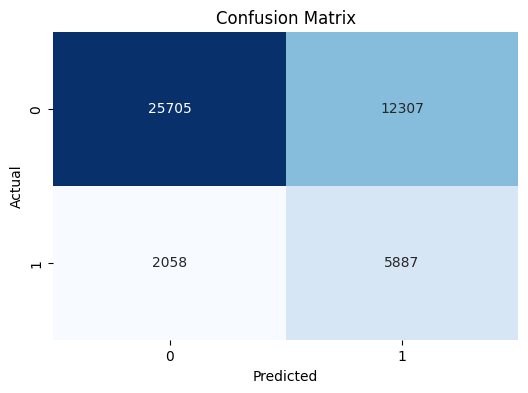

In [24]:
from sklearn.utils import resample
# create a stratified sample from the SMOTE training data
sample_size = 20000
np.random.seed(42)
sample_idx = np.random.choice(len(X_train_smote), size=sample_size, replace=False)
X_train_knn = X_train_smote.iloc[sample_idx] if hasattr(X_train_smote, 'iloc') else pd.DataFrame(X_train_smote).iloc[sample_idx]
y_train_knn = y_train_smote.iloc[sample_idx] if hasattr(y_train_smote, 'iloc') else pd.Series(y_train_smote).iloc[sample_idx]

print(f"KNN training sample size: {len(X_train_knn)}")

#Define the model
knn = KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(
    knn,
    param_grid=param_grid_knn, cv=5, scoring='f1', n_jobs=-1, verbose=1
)

print("Training KNN with GridSearch")
grid_knn.fit(X_train_knn, y_train_knn)

print("\nBest Parameter:", grid_knn.best_params_)
print("Best CV f1 score: {:.4f}".format(grid_knn.best_score_))

# Evaluate on test set
y_pred_knn = grid_knn.predict(X_test_scaled)

print("KNN Metrics:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

cm_knn = confusion_matrix(y_test, y_pred_knn)
print("\nConfusion Matrix:")
print(cm_knn)

plt.figure(figsize=(6,4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

SVM training sample size: 20000
Training SVM with GridSearch
Fitting 5 folds for each of 2 candidates, totalling 10 fits

Best Parameter: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV f1 score: 0.7554
SVM Metrics:

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.71      0.81     38012
           1       0.35      0.75      0.48      7945

    accuracy                           0.72     45957
   macro avg       0.64      0.73      0.64     45957
weighted avg       0.83      0.72      0.75     45957


Confusion Matrix:
[[27015 10997]
 [ 1991  5954]]


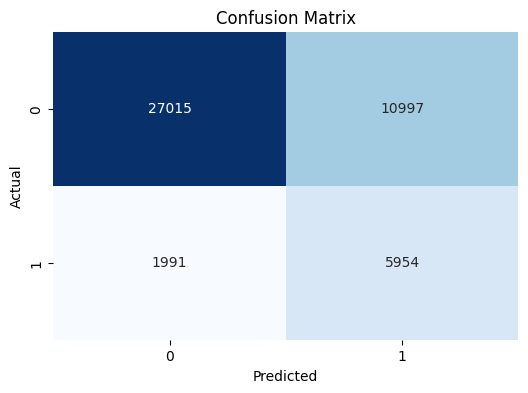

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

#SVM with Grid Search
np.random.seed(42)
sample_idx = np.random.choice(len(X_train_smote), size=20000, replace=False)
x_train_svm = X_train_smote.iloc[sample_idx]
y_train_svm = y_train_smote.iloc[sample_idx]


print(f"SVM training sample size: {len(x_train_svm)}")

# Define the model
svm = SVC()

#hyperparameter
param_grid_svm = {
    'C': [1, 10],
    'kernel': ['rbf'],
    'gamma': ['scale']
}

grid_svm = GridSearchCV(
    svm,
    param_grid=param_grid_svm,
    cv=5,
    scoring='f1',
    n_jobs=-1, verbose=1
)

print("Training SVM with GridSearch")
grid_svm.fit(x_train_svm, y_train_svm)

print("\nBest Parameter:", grid_svm.best_params_)
print("Best CV f1 score: {:.4f}".format(grid_svm.best_score_))

#predict on test set

y_pred_svm = grid_svm.predict(X_test_scaled)

print("SVM Metrics:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

cm_svm = confusion_matrix(y_test, y_pred_svm)
print("\nConfusion Matrix:")
print(cm_svm)

plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Model Results
                     Accuracy  Precision  Recall  F1 Score
Model                                                     
Logistic REgression    0.7205     0.3537  0.7461    0.4799


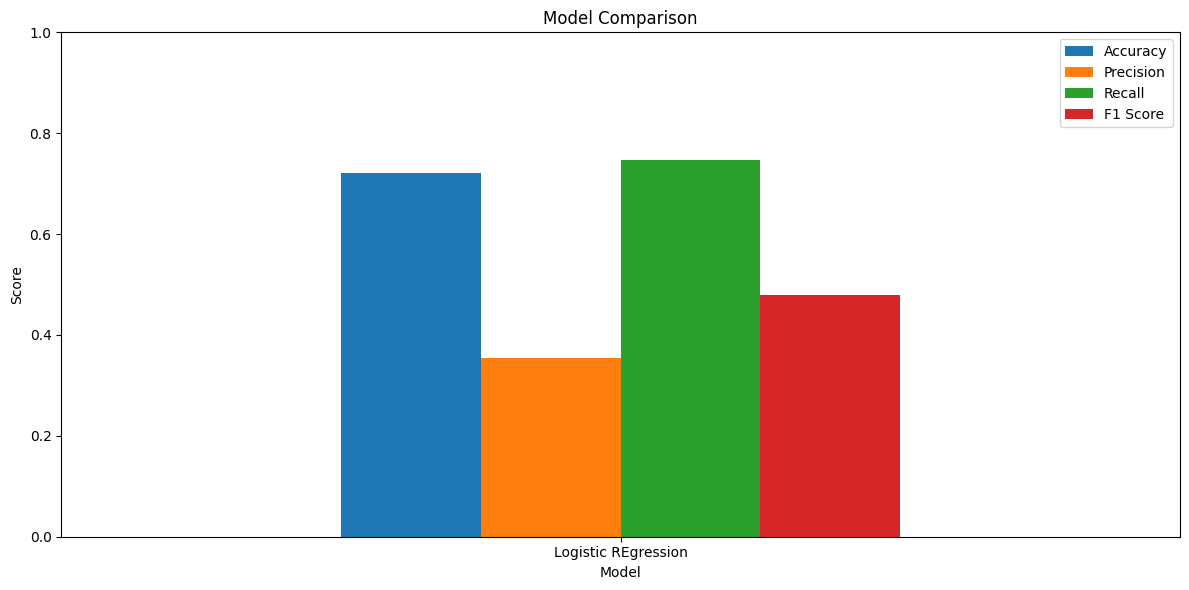

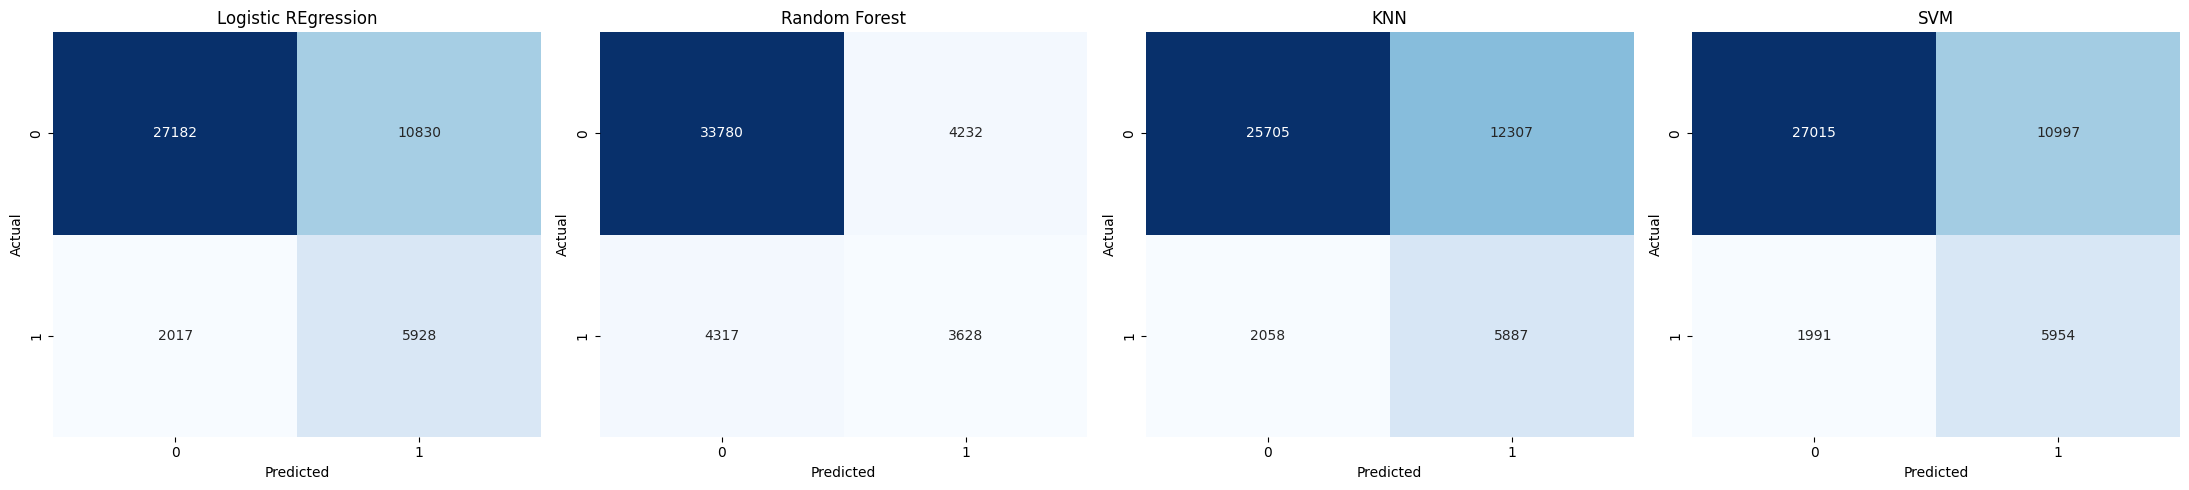

Model Results
                     Accuracy  Precision  Recall  F1 Score
Model                                                     
Logistic REgression    0.7205     0.3537  0.7461    0.4799
Random Forest          0.8140     0.4616  0.4566    0.4591


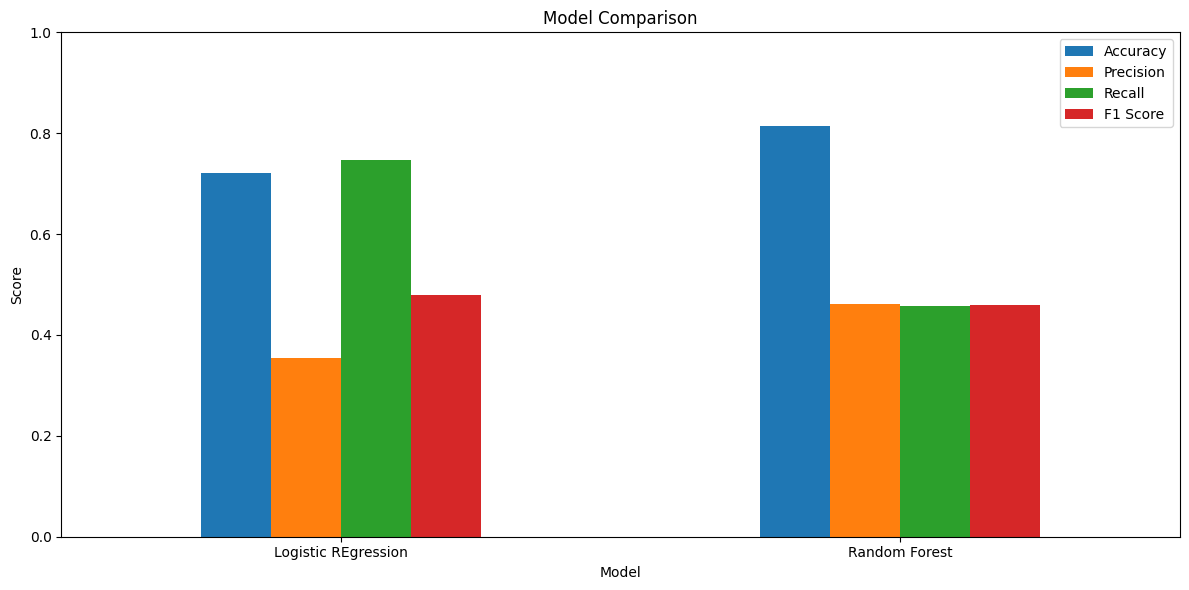

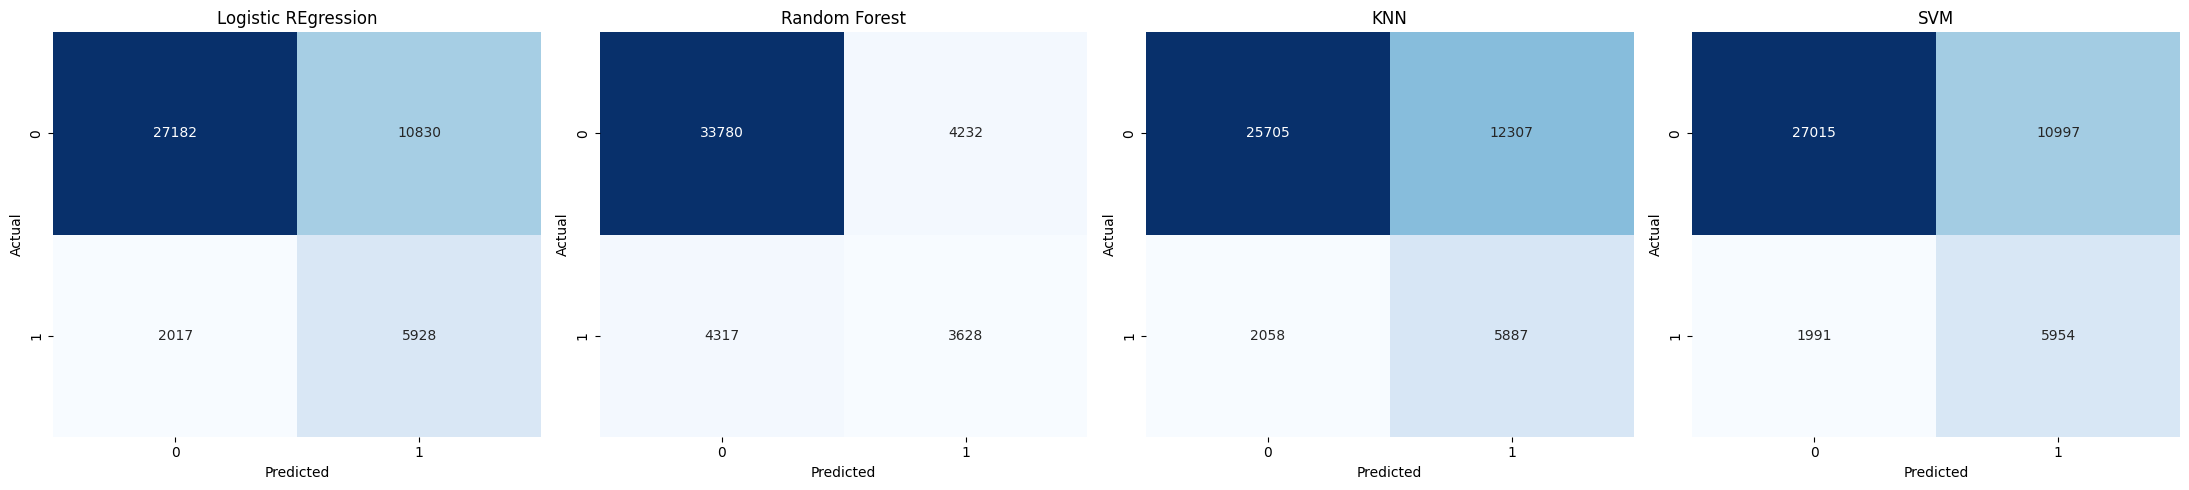

Model Results
                     Accuracy  Precision  Recall  F1 Score
Model                                                     
Logistic REgression    0.7205     0.3537  0.7461    0.4799
Random Forest          0.8140     0.4616  0.4566    0.4591
KNN                    0.6874     0.3236  0.7410    0.4504


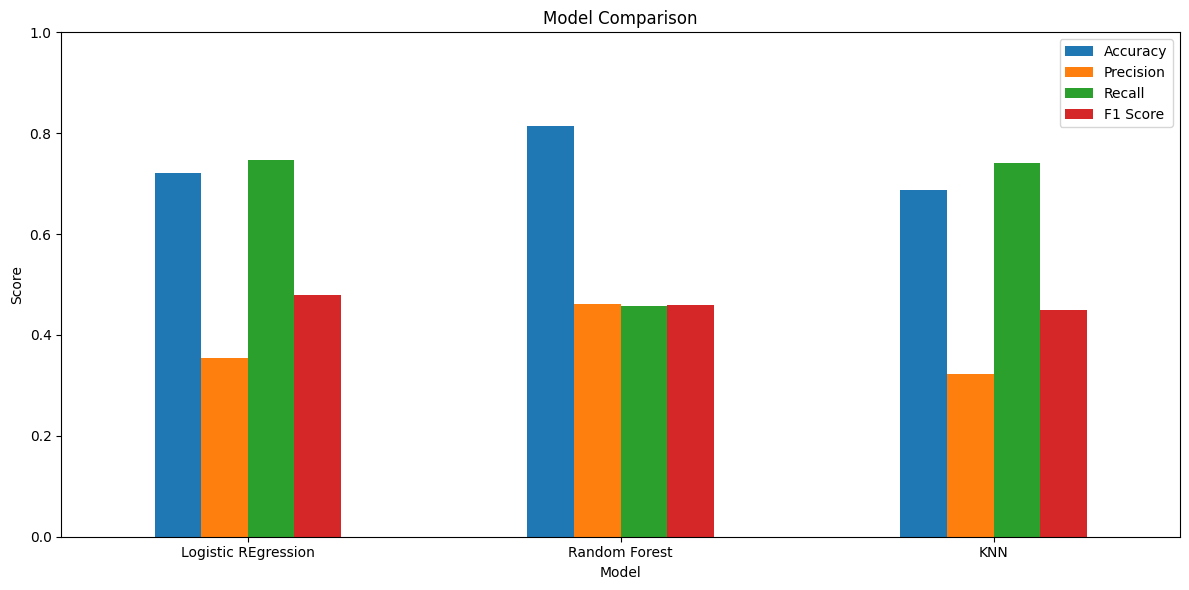

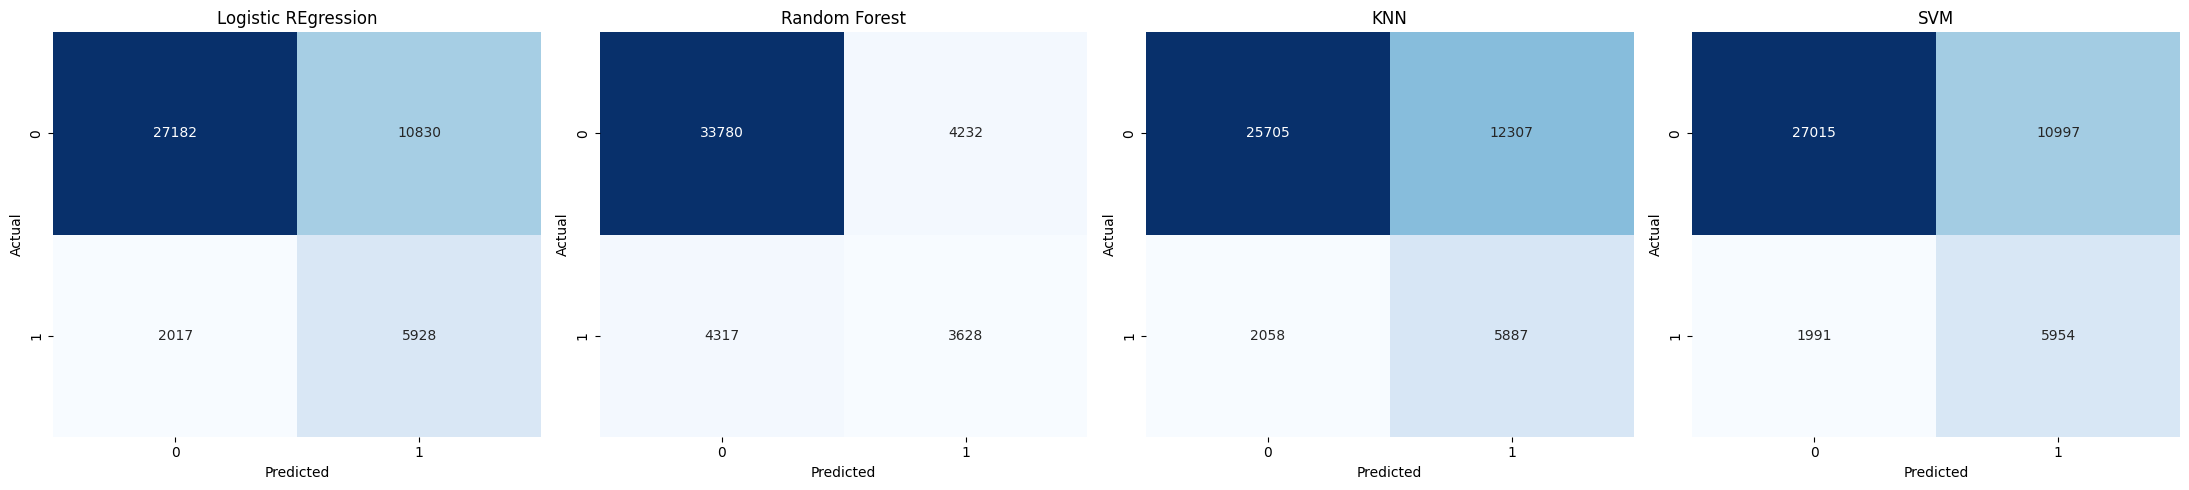

Model Results
                     Accuracy  Precision  Recall  F1 Score
Model                                                     
Logistic REgression    0.7205     0.3537  0.7461    0.4799
Random Forest          0.8140     0.4616  0.4566    0.4591
KNN                    0.6874     0.3236  0.7410    0.4504
SVM                    0.7174     0.3512  0.7494    0.4783


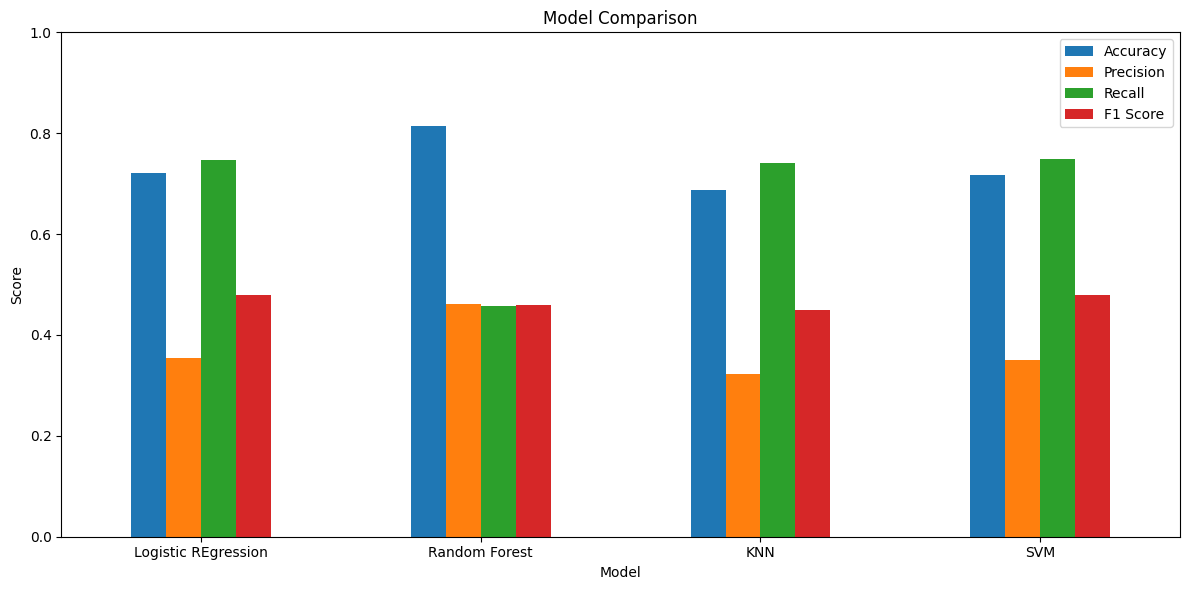

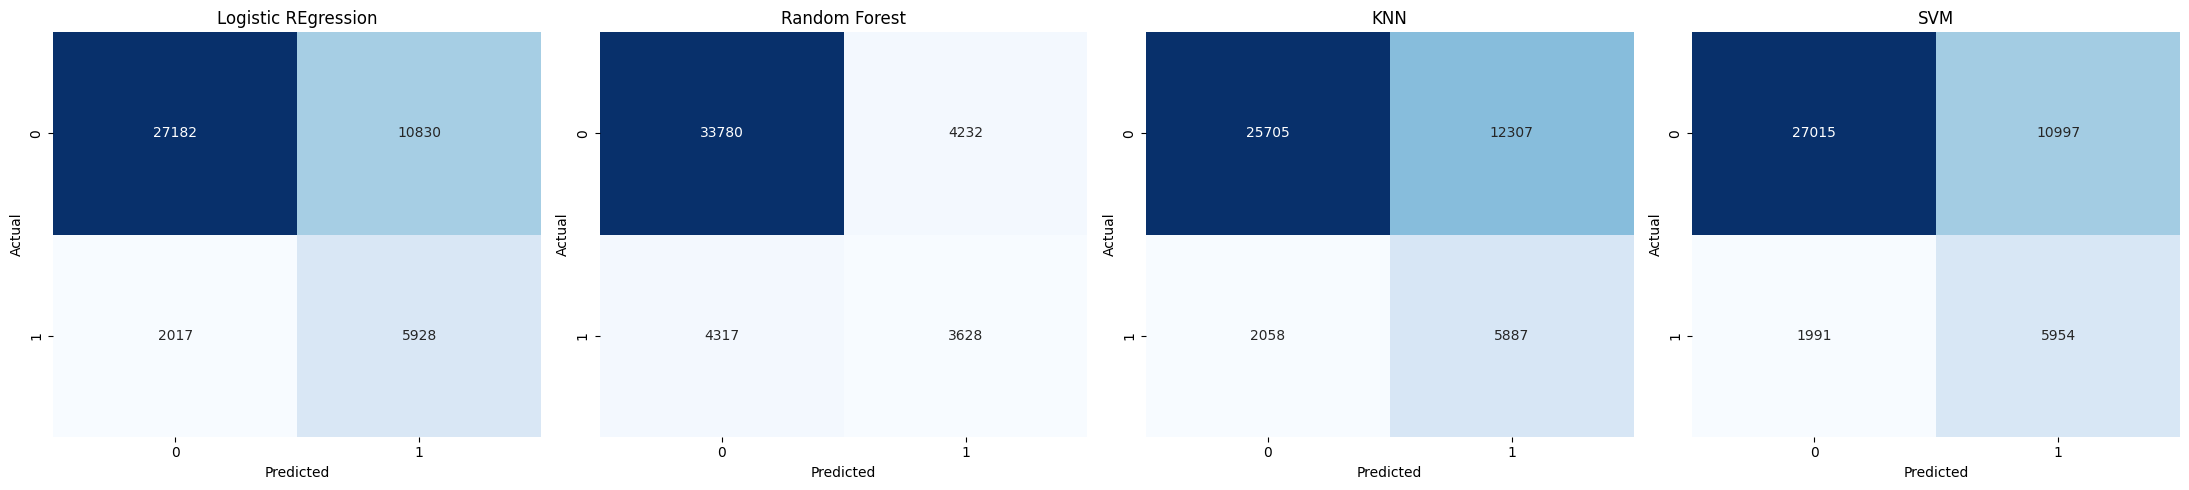

In [33]:
#Model comparision
from sklearn.metrics import recall_score, precision_score

models = {
    'Logistic REgression' : y_pred_lr ,
    'Random Forest' : y_pred_rf ,
    'KNN' : y_pred_knn ,
    'SVM' : y_pred_svm
}
results = []
for name, y_pred in models.items():
  results.append({
      'Model': name,
      'Accuracy': accuracy_score(y_test, y_pred),
      'Precision': precision_score(y_test, y_pred),
      'Recall': recall_score(y_test, y_pred),
      'F1 Score': f1_score(y_test, y_pred)
  })

  results_df = pd.DataFrame(results).set_index('Model').round(4)
  print("Model Results")
  print(results_df)

  # visualisation
  results_df.plot(kind='bar', figsize=(12,6), rot=0)
  plt.title('Model Comparison')
  plt.ylabel('Score')
  plt.ylim(0,1)
  plt.tight_layout()
  plt.show()

  # confusion matrix comparison
  f, axes = plt.subplots(1, 4, figsize=(22, 5))
  for i, (name, y_pred) in enumerate(models.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',cbar=False, ax=axes[i])
    axes[i].set_title(name)
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
  plt.tight_layout()
  plt.show()